In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('headbrain.csv')

In [3]:
df.shape

(237, 4)

In [4]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
df.dtypes

Gender                 int64
Age Range              int64
Head Size(cm^3)        int64
Brain Weight(grams)    int64
dtype: object

In [6]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


### Gender and Age Range are categorical variables 
### Head Size and Brain Weight are continuou in nature

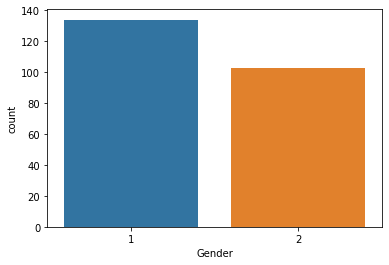

In [7]:
sns.countplot(df['Gender'], data=df)

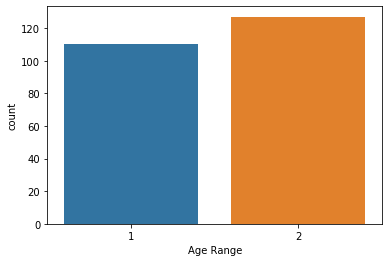

In [8]:
sns.countplot(df['Age Range'], data=df)

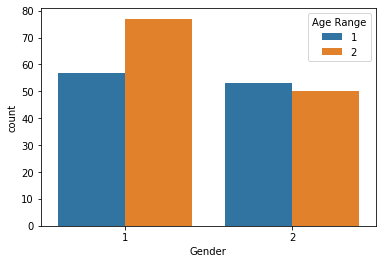

In [9]:
sns.countplot(df['Gender'], hue='Age Range' ,data=df)

c:\users\ajay thakur\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


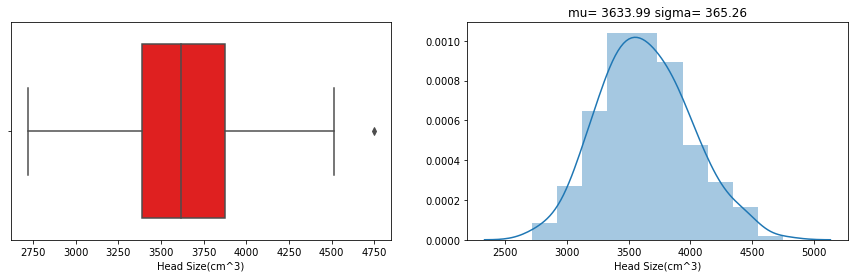

In [10]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
sns.boxplot(x='Head Size(cm^3)',data=df, color='red', ax=ax[0])
sns.distplot(df['Head Size(cm^3)'], bins=10, ax=ax[1])
plt.title('mu= {0:.2f} sigma= {1:.2f}'.format(df['Head Size(cm^3)'].mean(),df['Head Size(cm^3)'].std()))
fig.show()

Text(0.5, 1.0, 'Head Size Vs Brain Weight')

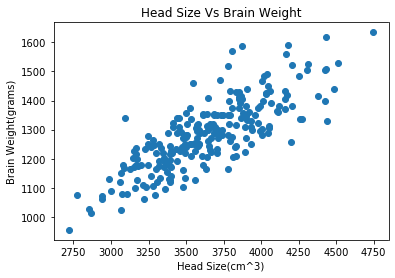

In [11]:
plt.scatter(df['Head Size(cm^3)'],df['Brain Weight(grams)'])
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')

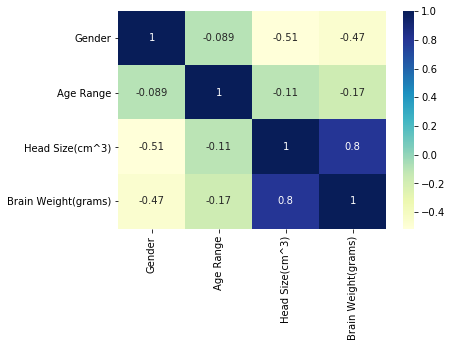

In [12]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)

In [13]:
X = df['Head Size(cm^3)'].values.reshape(-1,1)
y = df['Brain Weight(grams)'].values

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
def Scores(y_test, y_pred):
    print('R2 Score : ',r2_score(y_test, y_pred))
    print('RMSE     : ',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('MSE      : ',mean_squared_error(y_test,y_pred))

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

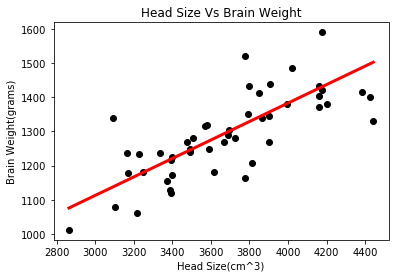

R2 Score :  0.5571552826824453
RMSE     :  80.36387262154913
MSE      :  6458.352022732574


In [17]:
# models
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# plot
x_grid = np.arange(min(X_test),max(X_test), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X_test,y_test,color='black')
plt.plot(x_grid, model.predict(x_grid), color='red', linewidth= 3)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')
plt.show()

Scores(y_test, y_pred)

In [18]:
from sklearn.tree import DecisionTreeRegressor

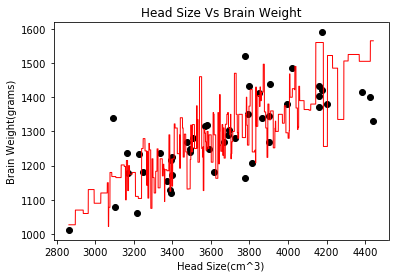

R2 Score :  0.1726577510696098
RMSE     :  109.84435010504637
MSE      :  12065.78125


In [19]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#plot
x_grid = np.arange(min(X_test),max(X_test), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X_test,y_test,color='black')
plt.plot(x_grid, model.predict(x_grid), color='red', linewidth= 1)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')
plt.show()

Scores(y_test, y_pred)

In [20]:
from sklearn.ensemble import RandomForestRegressor

c:\users\ajay thakur\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


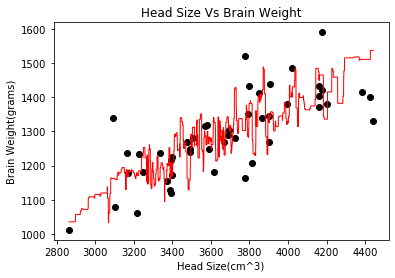

R2 Score :  0.4427195956950539
RMSE     :  90.15130307597498
MSE      :  8127.257446296296


In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#plot
x_grid = np.arange(min(X_test),max(X_test), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X_test,y_test,color='black')
plt.plot(x_grid, model.predict(x_grid), color='red', linewidth= 1)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')
plt.show()

Scores(y_test, y_pred)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

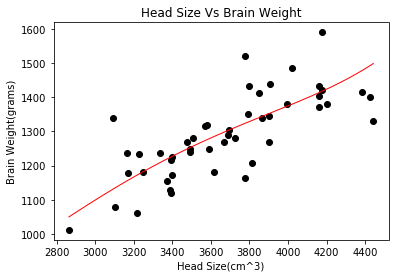

R2 Score :  0.5523997917201333
RMSE     :  80.79421439172117
MSE      :  6527.7050791754045


In [23]:
degree = 5
model = make_pipeline(PolynomialFeatures(degree),LinearRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#plot
x_grid = np.arange(min(X_test),max(X_test), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X_test,y_test,color='black')
plt.plot(x_grid, model.predict(x_grid), color='red', linewidth= 1)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')
plt.show()

Scores(y_test, y_pred)

In [47]:
X = df.drop(['Gender','Age Range','Brain Weight(grams)'], axis=1).values
y = df['Brain Weight(grams)'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# models
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
Scores(y, y_pred)

R2 Score :  0.639311719957
RMSE     :  72.1206213783709
MSE      :  5201.3840280023305


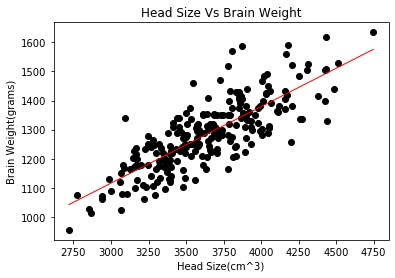

In [48]:
#plot
x_grid = np.arange(min(X),max(X), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(X,y,color='black')
plt.plot(x_grid, model.predict(x_grid), color='red', linewidth= 1)
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.title('Head Size Vs Brain Weight')
plt.show()

In [49]:
X = df.drop(['Brain Weight(grams)'], axis=1).values
y = df['Brain Weight(grams)'].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# models
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
Scores(y, y_pred)

R2 Score :  0.6528346387526653
RMSE     :  70.7557335304263
MSE      :  5006.373827428692
